<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

## imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
# for reading csv in Colab
from google.colab import files
# uploaded = files.upload() # if first time uncomment this and manually load in data # use chrome not firefox, not incognito
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
# uploaded = files.upload()
from sklearn.feature_extraction import text 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [13]:
df = pd.read_csv( io.BytesIO(uploaded['horoscope_saved.csv']) ) # nrows = 100
# horoscopes = np.genfromtxt(io.BytesIO(uploaded['horoscope_saved.csv']), delimiter = ',', max_rows = 100)

In [14]:
scorpio_raw = ["Scorpio’s archetypal traits are derived from its receptive, feminine, or yin qualities, making this sign oriented toward contemplation and engagement with inner awareness. Alive in both a Scorpio woman or Scorpio man, those born with the Scorpion as their rising, sun, or moon sign have a mysterious, intuitive, and power-wielding dynamic in the core of their personality, an echo of the shadowy Autumn season. As a fixed sign, Scorpio holds the qualities of being a sustainer, being able to apply profound powers of concentration to projects, and discovering hidden truths. As a result, those with the sign of the Scorpion prominent in their charts tend to be magnetic, highly sensitive, intuitive, creative, and secretive at times. The primary Scorpio strengths can be found in their devoted, determined, and observant natures. They are hard workers, often artistic, and deeply committed to study and research. You can count on the Scorpion to see whatever they have committed to through to the end. Scorpios tend to be receptive and patient, letting others play their cards and show their intentions first to better understand the emotional and psychological dynamics of their relationships. Magnetic and mysterious, Scorpio is drawn toward dark, taboo, or occult subjects, and are curious about the hidden facets of life that others may shy away from. The Scorpion tends to be fearless in the dark, avoided, and mysterious inner depths of the psyche, and potent realities of life like death and transformation. While Scorpio is often misunderstood and feared as an archetype, those born under this sign are very sensitive, empathetic, and can be quite compassionate. They passionately bond themselves, heart and soul, to those they care for. Once they feel they can trust, they are quite loyal to the friends and lovers that make it into their inner circle. Scorpio understands innately what it feels like to be the weirdo or the outsider, and they have a natural connection to the underdog or those who are deemed untouchable in society. Because of this, they are uniquely poised to be of great service to those in our society that suffer the most, like the homeless, the mentally ill, and people who have been outcast for divergent spiritual beliefs or lifestyles. Anyone with preferences that challenge conventional sexual, spiritual, and social ideas are potentially the Scorpion’s greatest allies and sources of affinity and acceptance. Scorpio can take emotional intelligence, understanding, and healing to the darkest circumstances, and may have had to overcome some healing or transformative experience of their own in their lives. Their fearless understanding of trauma, and survival, makes these folks the strongest psychic and spiritual warriors. Some potential weaknesses in the Scorpio archetype are rooted in their great strengths. Though they are determined and devoted to their work, they can become so rigid, fixated, and obsessed that it can be difficult to adapt to changes or to let go of an idea that is no longer useful. Those born under the sign of the Scorpion are receptive and patient, but they can be suspicious and slow to trust. Others may be forthcoming about their vulnerabilities, but if Scorpios are feeling insecure, they can use what others have revealed to be emotionally manipulative and controlling. Like the other fixed signs, they can be slow to forgive, and those that cross the Scorpion may feel their vengeful sting. Being naturally drawn to taboo and occult subjects can have the Scorpion inordinately focused on the dark side of life, giving them a pessimistic and nihilistic worldview. They may start seeking darker motives everywhere, which can lead to isolation and paranoia. It can then be hard to relax, trust, and enjoy life’s simple pleasures to stay in balance. Naturally sensitive and passionate, those born under the sign of the Scorpion give themselves heart and soul when seeking love and sexual connection, but if this isn’t reciprocated with the same intensity, they can become needy and obsessive with their lovers. Because of their co-relation with planet Pluto, Scorpios are often drawn to go beyond the fringes of society to seek thrill and adventure, yet this can easily lead the Scorpion into danger and self-destruction. Like a moth to a flame, they are lured toward intensity, but this may not always be in their best interest. Like all water signs, Scorpio is vulnerable to absorbing toxic energies, so if they are offering healing or counseling work, they need to have cleansing practices. Breathing exercises, saunas, smudging, and protective aura visualizations are all ways the Scorpio native can maintain psychic health. Scorpios may need to seek and maintain healing of their own before they engage in service work. Moon in Scorpio natives, especially, may have to work through dark moods and depression at times in their lives. Scorpio children will be well-nurtured if they are accepted unconditionally, and not shamed for having unique interests or big life questions. Acceptance at home may help offset a teenage Scorpio’s rebellion, and challenging artistic pursuits or martial arts may keep these fearless natives positively occupied."]

In [15]:
stop_words_scorpio = ['scorpio', 'scorpion', 'born', 'like', 'life', 'sign', 'scorpios']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


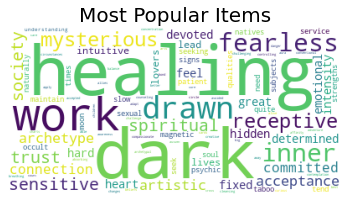

In [16]:
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_scorpio)
vectorizer = TfidfVectorizer(stop_words=stop_words)
vecs = vectorizer.fit_transform(scorpio_raw)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
cloud_df = pd.DataFrame(lst1, columns=feature_names)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(cloud_df.T.sum(axis=1))

plt.imshow(Cloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)
plt.show()

In [17]:
df.head()

,sign,category,date,horoscope
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'll be blessed with the ability to solve problems, and others will come looking for you today. You'll listen, understand, and express empathy. You'll be wise enough to find solutions to any issues they present to you. After a day like this, you might ask yourself if you shouldn't work as a therapist."
1,aries,general,20200618,"People will understand and appreciate your desire to stand out from the crowd today, Aries. This isn't a sign of arrogance on your part. It's just that you're particularly perceptive right now and people need your good advice. Since you're ready to step into the spotlight and shine like the stars that are giving you all this wonderful energy, go for it. You'd kick yourself if you let this opportunity pass."
2,aries,general,20200619,"You are very interested in technological breakthroughs and innovation, Aries, especially if it has some benefit for individuals. Since you also concern yourself with social issues and subjects like psychology and spiritual therapies, you realize the importance of progress in these areas for the future. You also wonder where you fit in."
3,aries,general,20200620,"Stress from overwork could have you feeling weaker than usual. You might be tempted to stay at home, get some rest, and recoup your energies. Do this if you can, Aries. Otherwise, you may not be able to give your project the concentration it needs, and therefore may not accomplish as much as you think you should. If you feel you can't stay home, try to work alone so you won't be distracted."
4,aries,general,20200621,"This is a good day to stand up for yourself and make it known that you aren't a pushover, Aries. Use the powerful energy of the day to follow through on projects that may have lost momentum. Pick up the reins and take control of the direction of your life. Feel free to be more aggressive than you normally would. Show others your incredible worth."


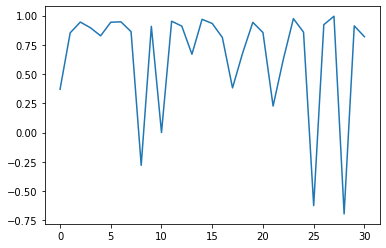

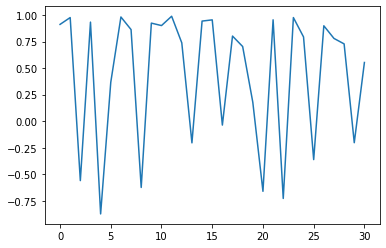

13132    Communication with friends and lovers may be limited by emotional factors today, Scorpio. You may have a tendency to overreact to casual comments that are probably innocent but that you misinterpret as offensive. Quarrels over nothing could result, which could raise your blood pressure and stress level for no good reason. If ever there was a day to think before speaking, this is it.
Name: horoscope, dtype: object
13139    You will feel especially close to family and friends today, Scorpio. There's a lot of positive energy in the air, and people feel optimistic and congenial. It's a pleasure to be with your loved ones, and interactions with strangers have a lovely flavor as well. Take advantage of the warm astral energy and plan a get-together with your favorite people. You will enjoy growing closer.
Name: horoscope, dtype: object
2176    Today a number of chores around the home could have you feeling overwhelmed, Taurus. Family members might abandon you, leaving you disgruntle

In [18]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()


taurus_love = df[(df['sign'] == 'taurus') & (df['category'] == 'general') & (df['date'] > 20210430) & (df['date'] < 20210601)].sort_values(by='date')

vs_taurus = []
for i in range(taurus_love['date'].size):
    vs_taurus.append(analyzer.polarity_scores(taurus_love[i:i+1]['horoscope'])['compound'])


plt.plot(range(taurus_love['date'].size), vs_taurus)
plt.show()


scorpio_love = df[(df['sign'] == 'scorpio') & (df['category'] == 'general') & (df['date'] > 20210430) & (df['date'] < 20210601)].sort_values(by='date')

vs = []
for i in range(scorpio_love['date'].size):
    vs.append(analyzer.polarity_scores(scorpio_love[i:i+1]['horoscope'])['compound'])


plt.plot(range(scorpio_love['date'].size), vs)
plt.show()

# See high vs. low
index_of_lowest_sentiment = np.argmin(np.array(vs))
low_sent = str(scorpio_love[index_of_lowest_sentiment:index_of_lowest_sentiment+1]['horoscope'])

index_of_high_sentiment = np.argmax(np.array(vs))
high_sent = str(scorpio_love[index_of_high_sentiment:index_of_high_sentiment+1]['horoscope'])
print(low_sent)
print(high_sent)

# See high vs. low
index_of_lowest_sentiment_taurus = np.argmin(np.array(vs_taurus))
low_sent_taurus = str(taurus_love[index_of_lowest_sentiment_taurus:index_of_lowest_sentiment_taurus+1]['horoscope'])

index_of_high_sentiment_taurus = np.argmax(np.array(vs_taurus))
high_sent_taurus = str(taurus_love[index_of_high_sentiment_taurus:index_of_high_sentiment_taurus+1]['horoscope'])
print(low_sent_taurus)
print(high_sent_taurus)

In [19]:
((df['date'] > 20200530) & (df['date'] < 20200701)).sum()

899